# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Individual Coding Challenge
Week 5 | Day 2

This is your first individual coding challenge. There are a series of exercises in this notebook that you will need to perform. This challenge to be done individually - **without help from either fellow students or the instructors**. You are free to use the documention or any online resources you choose. You will have one hour to complete this workbook. If you get stuck on one question keep moving.<br><br> **It must be submitted before 5pm via Slack**. <br><br>**- _NO LATE ENTRIES WILL BE ACCEPTED_ - <br><br>The Slack timestamp of submission will be definitive.**

### 1. Read in the csv at this link using pandas and save it as a DataFrame:
https://www.dropbox.com/s/1k9cgsd7bzce0yk/housing-data.csv?dl=1

In [101]:
#from __future__ import division, print_function

import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.core.display import Image, HTML

import random

import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pd.options.mode.chained_assignment = None
from sklearn.metrics import confusion_matrix


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [45]:
housing= pd.read_csv('https://www.dropbox.com/s/1k9cgsd7bzce0yk/housing-data.csv?dl=1')

In [46]:
housing.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


### 2. Get the datatypes of your DataFrame and find the 75th percentile of 'age' and 'price'

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


In [102]:
print

print "housingage 75th percentile"
#np.percentile(housing['age'], 75)

SyntaxError: invalid syntax (<ipython-input-102-893ec0eb5ab4>, line 3)

In [49]:
##housing/price 75th percentile
np.percentile(housing['price'], 75)

384450.0

### 3. Get the correlations for each column vs. the others. Which feature has the highest correlation with price?

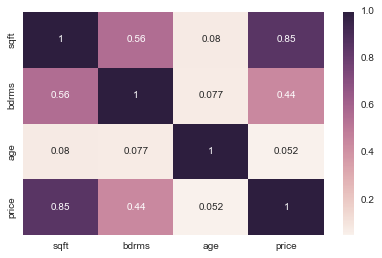

In [50]:
sns.heatmap(housing.corr(), annot=True)

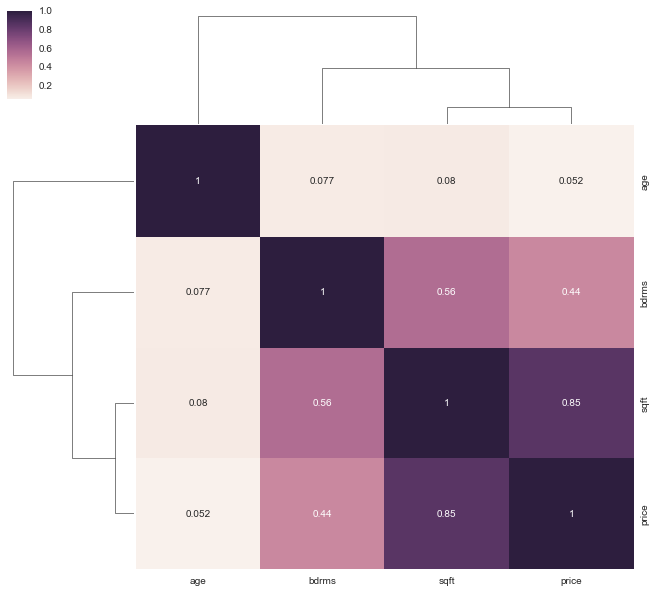

In [51]:
sns.clustermap(housing.corr(), annot=True)

In [52]:
#sqft has the highest correlations

### 4. Plot the correlations and histograms using seaborn

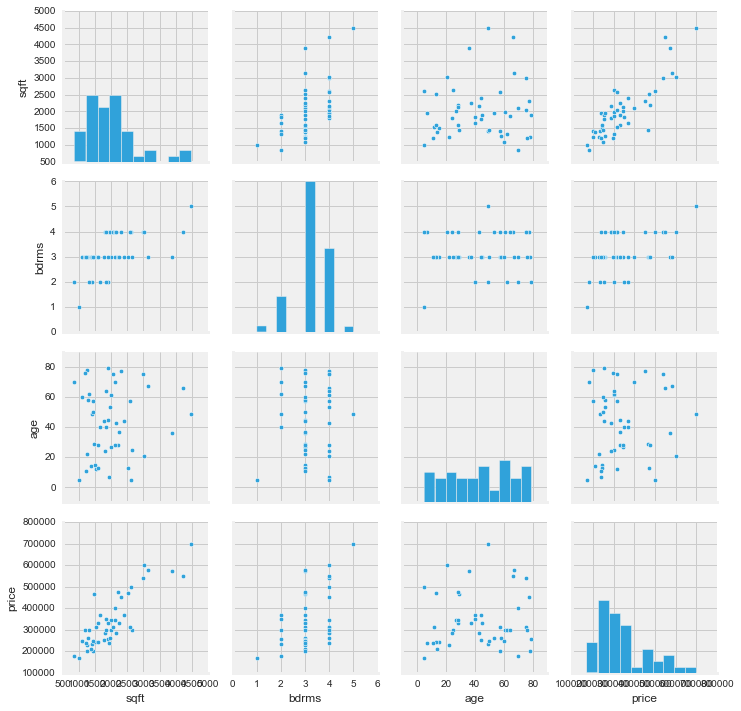

In [53]:
sns.pairplot(housing)

### 5. Change the column names to uppercase using a list comprehension

In [54]:
housing.columns =[str.upper(x) for x in housing.columns]

In [55]:
housing.columns 

Index([u'SQFT', u'BDRMS', u'AGE', u'PRICE'], dtype='object')

### 6. Standardize each column - except price - using a list comprehension. Save the newly scaled columns to the DataFrame with the prepend 'SC_'. For example, 'SC_BDRMS'. You may use numpy for this. 

Refer to this if you are confused as to the formula: [Standardization](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling)

In [74]:
housing_n=housing.copy()

In [75]:
nc =[x for x in housing_n.columns if x!= 'PRICE']

In [76]:
housing_n.ix[:, nc]= (housing_n.ix[:,nc]-housing_n.ix[:, nc].mean())/housing_n.ix[:,nc].std()

In [77]:
housing.head()

,SQFT,BDRMS,AGE,PRICE
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [78]:
housing_n.columns=['SC_'+x for x in housing_n.columns]
housing_n

,SC_SQFT,SC_BDRMS,SC_AGE,SC_PRICE
0,0.130010,-0.223675,1.191571,399900
1,-0.504190,-0.223675,-0.644620,329900
2,0.502476,-0.223675,0.054881,369000
3,-0.735723,-1.537767,0.273475,232000
4,1.257476,1.090417,1.410165,539900
5,-0.019732,1.090417,0.798101,299900
6,-0.587240,-0.223675,-1.344121,314900
7,-0.721881,-0.223675,0.623226,198999
8,-0.781023,-0.223675,-1.256684,212000
9,-0.637573,-0.223675,-1.212965,242500


In [81]:
housing2=pd.concat([housing,housing_n[['SC_SQFT', 'SC_BDRMS', 'SC_AGE']] ], axis=1)

In [82]:
housing2

,SQFT,BDRMS,AGE,PRICE,SC_SQFT,SC_BDRMS,SC_AGE
0,2104,3,70,399900,0.130010,-0.223675,1.191571
1,1600,3,28,329900,-0.504190,-0.223675,-0.644620
2,2400,3,44,369000,0.502476,-0.223675,0.054881
3,1416,2,49,232000,-0.735723,-1.537767,0.273475
4,3000,4,75,539900,1.257476,1.090417,1.410165
5,1985,4,61,299900,-0.019732,1.090417,0.798101
6,1534,3,12,314900,-0.587240,-0.223675,-1.344121
7,1427,3,57,198999,-0.721881,-0.223675,0.623226
8,1380,3,14,212000,-0.781023,-0.223675,-1.256684
9,1494,3,15,242500,-0.637573,-0.223675,-1.212965


## 7. Use sk-learn's StandardScaler to confirm that your results are correct. You will need to read the documentation on how to use this.

[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [83]:
######## COME BACK TO
from sklearn import preprocessing

In [ ]:
preprocessing.StandardScaler().fit(housing.ix[:,nc])

In [ ]:
std_scale = preprocessing.StandardScaler().fit(housing[['SQFT', 'BDRMS', 'AGE']])
df_std = std_scale.transform(housing[['SQFT', 'BDRMS', 'AGE']], copy=True)


In [ ]:
minmax_scale = preprocessing.MinMaxScaler().fit(housing[['SQFT', 'BDRMS', 'AGE']])
df_minmax = minmax_scale.transform(housing[['SQFT', 'BDRMS', 'AGE']])

### 8. Using .apply() on your _DataFrame_, create a function that returns a count of the number of scaled columns that are positive. For example, if one scaled column is positive and two are negative, return 1. If all are negative return 0. Hint: It may be helpful to use .apply() on just a portion of your DataFrame. Save this new column as 'POS'.

In [84]:
housing_n['POS']=housing_n.apply(lambda x: 1 if x>=0 else -1 , axis=0)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', u'occurred at index SC_SQFT')

### 9. Using a lambda function with .apply() return a 1 if the price is above the mean price and a 0 if not. Save this new column as 'HIGH_PRICE'.

In [89]:
price_mean= housing['PRICE'].mean
price_mean

<bound method Series.mean of 0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: PRICE, dtype: int64>

In [90]:
housing['HIGH_PRICE']= [1 if x>(housing['PRICE'].mean) else 0 for x in housing['PRICE']]

### 9. Using a minimum of 3 feature columns (not 'PRICE'), set a design matrix (X).  Next set a target vector (y). The target vector should be the 'HIGH_PRICE' column you just created.

In [ ]:
features=housing[]

### 10. Using sk-learn's GridSearchCV and k-nn, find the optimal hyper-parmaters. Set the number of folds to 3 and the k to the range from 1 to 5. What is the best k? What is the best score? What does this score represent?

### Bonus: If you have time, re-run the model using the scaled feature columns using a logistic regression. Test which features are most important using a penalized regression. Which is better L1 or L2? What penalty (C) is optimal?